In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline

In [2]:
#read data
online = pd.read_excel('C:/Users/maris/Downloads/online retail.xlsx', encoding='latin1')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
online['TotalAmount'] = online['Quantity'] * online['UnitPrice']
online['InvoiceYear'] = (online['InvoiceDate'].dt.year)
online['InvoiceMonth'] = (online['InvoiceDate'].dt.month)
online['InvoiceYearMonth'] = online['InvoiceYear'].map(str) + "-" + online['InvoiceMonth'].map(str)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010.0,12.0,2010.0-12.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010.0,12.0,2010.0-12.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010.0,12.0,2010.0-12.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010.0,12.0,2010.0-12.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010.0,12.0,2010.0-12.0


In [4]:
online.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount,InvoiceYear,InvoiceMonth
count,534531.000000,534531.000000,401689.000000,534531.000000,534531.000000,534531.000000
mean,9.603232,4.635673,15289.649273,18.063938,2010.922685,7.565780
std,153.502302,97.422499,1713.984648,198.171422,0.267090,3.502733
min,-74215.000000,-11062.060000,12346.000000,-77183.600000,2010.000000,1.000000
25%,1.000000,1.250000,13956.000000,3.400000,2011.000000,5.000000
50%,3.000000,2.080000,15153.000000,9.840000,2011.000000,8.000000
75%,10.000000,4.130000,16794.000000,17.400000,2011.000000,11.000000
max,74215.000000,38970.000000,18287.000000,77183.600000,2011.000000,12.000000


In [5]:
# Total number of transactions
len(online['InvoiceNo'].unique())

25762

In [6]:
# Number of transactions with anonymous customers 
len(online[online['CustomerID'].isnull()]['InvoiceNo'].unique())

5688

In [7]:
# Total numbers of customers - +1 for null users
len(online['CustomerID'].unique())

4364

In [8]:
# Total profit
online['TotalAmount'].sum()

9655735.064000003

In [9]:
# Get top ranked ranked customers based on the total amount
customers_amounts = online.groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
customers_amounts.head(20)

CustomerID
14646.0    273692.86
18102.0    256438.49
17450.0    187482.17
14911.0    131003.30
12415.0    121993.61
14156.0    112810.99
17511.0     88021.70
16684.0     65257.20
13694.0     62405.66
15311.0     59318.34
14096.0     56581.09
13089.0     54390.19
15061.0     54172.58
17949.0     52750.84
15769.0     51823.72
16029.0     50992.61
14298.0     49889.54
14088.0     49771.69
17841.0     40013.31
13798.0     36111.42
Name: TotalAmount, dtype: float64

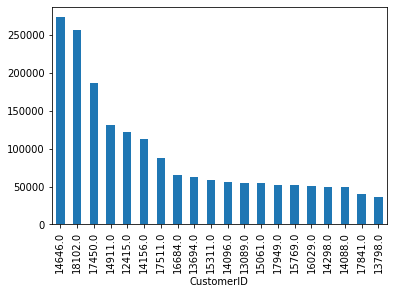

In [10]:
customers_amounts.head(20).plot.bar()

In [11]:
# Frequently sold items by quantitiy
gp_stockcode = online.groupby('Description')
gp_stockcode_frq_quantitiy = gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_quantitiy.head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751.0
JUMBO BAG RED RETROSPOT               47104.0
POPCORN HOLDER                        36334.0
ASSORTED COLOUR BIRD ORNAMENT         36181.0
PACK OF 72 RETROSPOT CAKE CASES       35999.0
WHITE HANGING HEART T-LIGHT HOLDER    35189.0
RABBIT NIGHT LIGHT                    30632.0
MINI PAINT SET VINTAGE                26293.0
PACK OF 12 LONDON TISSUES             26267.0
PACK OF 60 PINK PAISLEY CAKE CASES    24686.0
VICTORIAN GLASS HANGING T-LIGHT       23794.0
BROCADE RING PURSE                    23053.0
ASSORTED COLOURS SILK FAN             22955.0
RED  HARMONICA IN BOX                 21818.0
JUMBO BAG PINK POLKADOT               20973.0
SMALL POPCORN HOLDER                  20092.0
PAPER CHAIN KIT 50'S CHRISTMAS        18820.0
LUNCH BAG RED RETROSPOT               18763.0
60 TEATIME FAIRY CAKE CASES           17985.0
CHARLOTTE BAG SUKI DESIGN             17977.0
Name: Quantity, dtype: float64

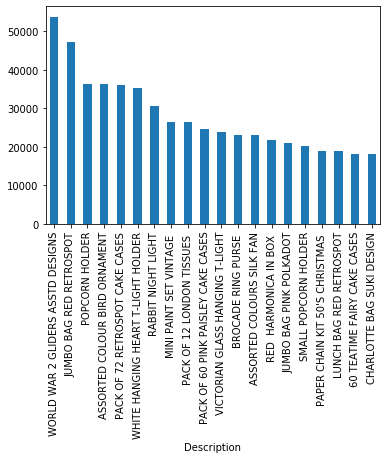

In [12]:
gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [13]:
# Frequently sold items by total amount
gp_stockcode_frq_amount = gp_stockcode['TotalAmount'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_amount.head(20)

Description
DOTCOM POSTAGE                        205553.47
REGENCY CAKESTAND 3 TIER              163443.24
WHITE HANGING HEART T-LIGHT HOLDER     99259.27
PARTY BUNTING                          97929.78
JUMBO BAG RED RETROSPOT                91877.37
RABBIT NIGHT LIGHT                     66656.75
POSTAGE                                65792.64
PAPER CHAIN KIT 50'S CHRISTMAS         63582.04
ASSORTED COLOUR BIRD ORNAMENT          58610.29
CHILLI LIGHTS                          53722.06
SPOTTY BUNTING                         41748.92
JUMBO BAG PINK POLKADOT                41546.08
BLACK RECORD COVER FRAME               40596.96
PICNIC BASKET WICKER 60 PIECES         39619.50
SET OF 3 CAKE TINS PANTRY DESIGN       37363.94
DOORMAT KEEP CALM AND COME IN          36466.09
JAM MAKING SET WITH JARS               36020.09
WOOD BLACK BOARD ANT WHITE FINISH      35727.72
LUNCH BAG RED RETROSPOT                34868.43
POPCORN HOLDER                         33969.46
Name: TotalAmount, dtype: fl

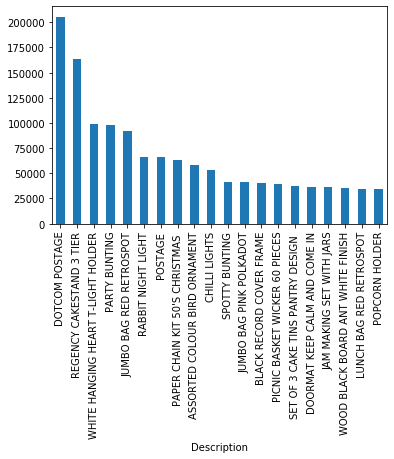

In [14]:
gp_stockcode_frq_amount.head(20).plot.bar()

In [15]:
# Explore by month
gp_month = online.sort_values('InvoiceDate').groupby(['InvoiceYear', 'InvoiceMonth'])
gp_month

In [16]:
# Month number of invoices
gp_month_invoices = gp_month['InvoiceNo'].unique().agg(np.size)
gp_month_invoices

InvoiceYear  InvoiceMonth
2010.0       12.0            1996
2011.0       1.0             1448
             2.0             1383
             3.0             1967
             4.0             1743
             5.0             2127
             6.0             1979
             7.0             1925
             8.0             1733
             9.0             2324
             10.0            2627
             11.0            3460
             12.0            1011
Name: InvoiceNo, dtype: int64

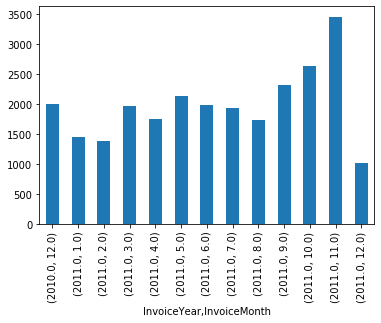

In [17]:
gp_month_invoices.plot.bar()

In [18]:
# Month total amounts
gp_month_frq_amount= gp_month['TotalAmount'].agg(np.sum)
gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010.0       12.0             733309.170
2011.0       1.0              547434.990
             2.0              491900.770
             3.0              679162.330
             4.0              489680.391
             5.0              703144.660
             6.0              682007.280
             7.0              676652.091
             8.0              679931.960
             9.0             1015992.552
             10.0            1067507.230
             11.0            1457583.670
             12.0             431427.970
Name: TotalAmount, dtype: float64

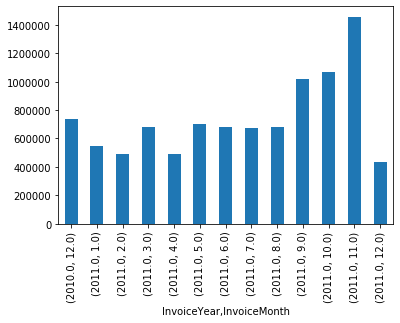

In [19]:
gp_month_frq_amount.plot.bar()

In [20]:
####################### Explore By Countries ###############
gp_country = online.groupby('Country')
# Order countries by total amount
gp_country['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom          8.114621e+06
Netherlands             2.786464e+05
EIRE                    2.610493e+05
Germany                 2.185575e+05
France                  1.959105e+05
Australia               1.353302e+05
Switzerland             5.589583e+04
Spain                   5.411026e+04
Belgium                 4.041901e+04
Sweden                  3.637415e+04
Norway                  3.490813e+04
Japan                   3.461606e+04
Portugal                2.927234e+04
Finland                 2.222669e+04
Channel Islands         1.995054e+04
Denmark                 1.866518e+04
Italy                   1.650603e+04
Cyprus                  1.279131e+04
Austria                 1.014928e+04
Hong Kong               1.003784e+04
Singapore               9.054690e+03
Israel                  7.867420e+03
Poland                  7.193340e+03
Unspecified             4.746650e+03
Greece                  4.644820e+03
Iceland                 4.299800e+03
Canada                  3.5996

In [21]:
# Order countries by number of invoices
gp_country['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          23332
Germany                   599
France                    458
EIRE                      358
Belgium                   118
Spain                     104
Netherlands               100
Switzerland                73
Portugal                   71
Australia                  69
Italy                      55
Finland                    47
Sweden                     46
Norway                     40
Channel Islands            32
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Greece                      6
Canada                      6
European Community          5
Czech Republic              5
Lithuania                   4
Bahrain                     4
Un

In [22]:
# Order countries by number of customers
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          3944
Germany                   94
France                    87
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     5
Greece                     4
USA                        4
EIRE                       4
Canada                     4
Bahrain                    3
United Arab Emirates       2
Malta                      2
Singapore                  1
Brazil                     1
Iceland                    1
Saudi Arabia               1
Hong Kong                  1
RSA                        1
Europe

In [23]:
# Work on undefined customers
gp_country_null = online[online['CustomerID'].isnull()].groupby('Country')
# Order countries by total amount [For the undefined users]
gp_country_null['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom    1405968.84
EIRE                12961.00
Hong Kong           10037.84
Unspecified          2082.72
Israel                913.57
France                691.06
Switzerland           645.95
Portugal              307.21
Bahrain                 0.00
Name: TotalAmount, dtype: float64

In [24]:
# Order countries by number of invoices [For the undefined users]
gp_country_null['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom    3601
EIRE                41
Hong Kong           15
Unspecified          5
Switzerland          3
Israel               3
France               3
Bahrain              2
Portugal             1
Name: InvoiceNo, dtype: int64

In [25]:
# Explore more info about United Kingdom invoices because it has the max total amount
# Get United Kingdom top ranked customers based on the total amount
uk_customers_amounts = online[online['Country']=='United Kingdom'].groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_customers_amounts.head(20)

CustomerID
18102.0    256438.49
17450.0    187482.17
17511.0     88021.70
16684.0     65257.20
13694.0     62405.66
15311.0     59318.34
14096.0     56581.09
13089.0     54390.19
15061.0     54172.58
17949.0     52750.84
15769.0     51823.72
16029.0     50992.61
14298.0     49889.54
14088.0     49771.69
17841.0     40013.31
13798.0     36111.42
16422.0     33805.69
12931.0     33462.81
16013.0     33366.25
15838.0     33350.76
Name: TotalAmount, dtype: float64

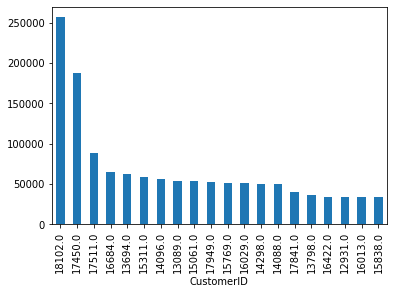

In [26]:
uk_customers_amounts.head(20).plot.bar()

In [27]:
# United Kingdom frequently sold items by quantitiy
uk_gp_stockcode = online[online['Country']=='United Kingdom'].groupby('Description')
uk_gp_stockcode_frq_quantitiy = uk_gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
uk_gp_stockcode_frq_quantitiy.head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      48230.0
JUMBO BAG RED RETROSPOT                42908.0
POPCORN HOLDER                         34365.0
ASSORTED COLOUR BIRD ORNAMENT          33479.0
WHITE HANGING HEART T-LIGHT HOLDER     33065.0
PACK OF 12 LONDON TISSUES              25259.0
PACK OF 72 RETROSPOT CAKE CASES        24686.0
VICTORIAN GLASS HANGING T-LIGHT        23182.0
BROCADE RING PURSE                     22801.0
PACK OF 60 PINK PAISLEY CAKE CASES     20269.0
ASSORTED COLOURS SILK FAN              20195.0
JUMBO BAG PINK POLKADOT                18900.0
SMALL POPCORN HOLDER                   18539.0
PAPER CHAIN KIT 50'S CHRISTMAS         18115.0
RED  HARMONICA IN BOX                  17754.0
HEART OF WICKER SMALL                  17180.0
PARTY BUNTING                          16633.0
JUMBO BAG STRAWBERRY                   15954.0
CHARLOTTE BAG SUKI DESIGN              15949.0
COLOUR GLASS T-LIGHT HOLDER HANGING    15400.0
Name: Quantity, dtype: float64

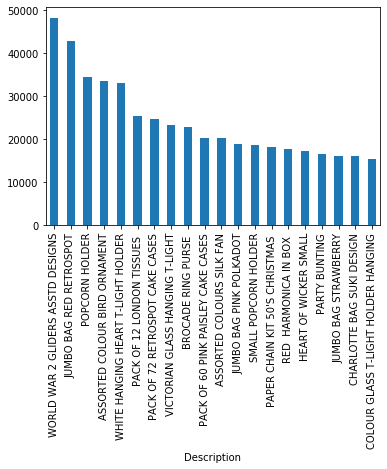

In [28]:
uk_gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [29]:
# Frequently sold items by total amount
uk_gp_stockcode_frq_amount = uk_gp_stockcode['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_gp_stockcode_frq_amount.head(20)

Description
DOTCOM POSTAGE                        205553.47
REGENCY CAKESTAND 3 TIER              133440.69
WHITE HANGING HEART T-LIGHT HOLDER     93543.87
PARTY BUNTING                          92128.53
JUMBO BAG RED RETROSPOT                84037.78
PAPER CHAIN KIT 50'S CHRISTMAS         61678.29
ASSORTED COLOUR BIRD ORNAMENT          54312.71
CHILLI LIGHTS                          52940.86
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               39387.00
RABBIT NIGHT LIGHT                     37869.20
JUMBO BAG PINK POLKADOT                37681.24
SPOTTY BUNTING                         36323.57
DOORMAT KEEP CALM AND COME IN          35370.04
WOOD BLACK BOARD ANT WHITE FINISH      34829.42
POPCORN HOLDER                         32425.81
HOT WATER BOTTLE TEA AND SYMPATHY      31857.39
VICTORIAN GLASS HANGING T-LIGHT        31608.17
HEART OF WICKER SMALL                  30857.45
JUMBO BAG STRAWBERRY                   30340.90
Name: TotalAmount, dtype: fl

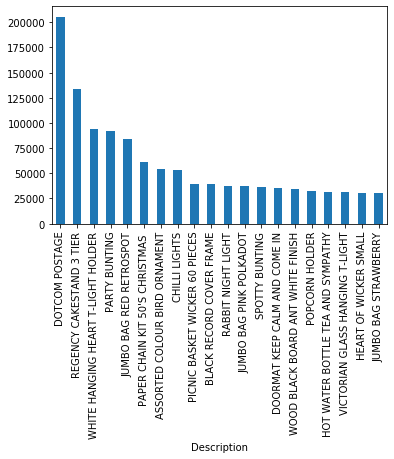

In [30]:
uk_gp_stockcode_frq_amount.head(20).plot.bar()

In [31]:
# Explore United Kingdom by month
uk_gp_month = online[online['Country']=='United Kingdom'].groupby(['InvoiceYear', 'InvoiceMonth'])
# United Kingdom By Month number of invoices
uk_gp_month_invoices = uk_gp_month['InvoiceNo'].unique().agg(np.size)
uk_gp_month_invoices

InvoiceYear  InvoiceMonth
2010.0       12.0            1859
2011.0       1.0             1301
             2.0             1249
             3.0             1786
             4.0             1621
             5.0             1943
             6.0             1800
             7.0             1762
             8.0             1544
             9.0             2087
             10.0            2351
             11.0            3111
             12.0             918
Name: InvoiceNo, dtype: int64

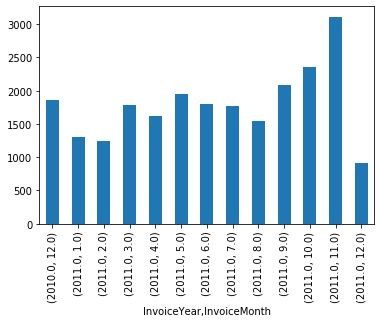

In [32]:
uk_gp_month_invoices.plot.bar()

In [33]:
# United Kingdom By Month total amounts
uk_gp_month_frq_amount= uk_gp_month['TotalAmount'].agg(np.sum)
uk_gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010.0       12.0             663651.580
2011.0       1.0              423192.210
             2.0              403031.810
             3.0              556537.530
             4.0              439534.671
             5.0              584113.310
             6.0              547160.620
             7.0              561215.681
             8.0              536835.570
             9.0              858884.922
             10.0             874491.910
             11.0            1279235.910
             12.0             386735.240
Name: TotalAmount, dtype: float64

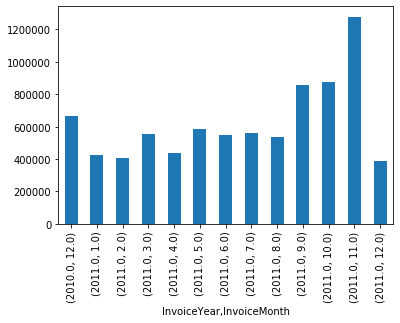

In [34]:
uk_gp_month_frq_amount.plot.bar()

In [35]:
## Part2. Get Association Rules
#################################
#set null description = stockCode
len(online[online['Description'].isnull()])

1443

In [36]:
for i, d in online[online['Description'].isnull()].iterrows():
    online['Description'][i] = "Code-" + str(d['StockCode'])

C:\Users\maris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
len(online[online['Description']==online['StockCode'].map(lambda x: "Code-"+str(x))])

1443

In [38]:
# Set transactions
gp_invoiceno = online.groupby('InvoiceNo')
transactions = []
for name,group in gp_invoiceno:
    transactions.append(list(group['Description'].map(str)))

In [39]:
# Training Apriori on the dataset
# Needs to import https://pypi.python.org/pypi/apyori/1.0.0
!pip install apyori


In [40]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.005, min_confidence = 0.2, min_lift = 3, min_length = 2)
# Get the results
results = list(rules) 

In [41]:
# Pop Visualising the result as a readeable dataframe
final_results = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0
for g, s, i in results:
    final_results.iloc[index] = [' _&&_ '.join(list(g)), ' _&&_ '.join(list(i[0][0])), ' _&&_ '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
# The most significant rules
final_results = final_results.sort_values('Lift', ascending=0)
final_results.head(20)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
4625,HERB MARKER MINT _&&_ HERB MARKER THYME _&&_ H...,HERB MARKER CHIVES,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,0.006560,0.808612,111.997170
4347,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,HERB MARKER CHIVES,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,0.006715,0.827751,109.920239
4346,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,HERB MARKER CHIVES,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,0.006754,0.832536,109.427497
4349,HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&...,HERB MARKER CHIVES,HERB MARKER PARSLEY _&&_ HERB MARKER THYME _&&...,0.006909,0.851675,108.082966
4348,HERB MARKER MINT _&&_ HERB MARKER THYME _&&_ H...,HERB MARKER CHIVES,HERB MARKER MINT _&&_ HERB MARKER THYME _&&_ H...,0.006638,0.818182,106.994924
3173,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,HERB MARKER CHIVES,HERB MARKER MINT _&&_ HERB MARKER PARSLEY,0.007103,0.875598,106.401688
2323,SET/6 COLLAGE PAPER PLATES _&&_ SET/6 COLLAGE ...,SET/6 COLLAGE PAPER CUPS,SET/6 COLLAGE PAPER PLATES,0.006094,0.887006,106.283905
3177,HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&...,HERB MARKER CHIVES,HERB MARKER PARSLEY _&&_ HERB MARKER THYME,0.007103,0.875598,105.902150
3175,HERB MARKER MINT _&&_ HERB MARKER CHIVES _&&_...,HERB MARKER CHIVES,HERB MARKER MINT _&&_ HERB MARKER THYME,0.006832,0.842105,105.312213
3176,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _...,HERB MARKER CHIVES,HERB MARKER PARSLEY _&&_ HERB MARKER ROSEMARY,0.007103,0.875598,104.917013


In [42]:
count=1
for i, d in final_results.head(20).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(d['Support'])+' - Confidence: '+str(d['Confidence'])+' - Lift: '+str(d['Lift']))
    print('--------------------')
    count=count+1

Rule #1:
HERB MARKER CHIVES 
=> HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER THYME _&&_ HERB MARKER ROSEMARY
Support: 0.006560049685583417 - Confidence: 0.8086124401913876 - Lift: 111.99717034521788
--------------------
Rule #2:
HERB MARKER CHIVES 
=> HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER THYME
Support: 0.006715317133762906 - Confidence: 0.8277511961722488 - Lift: 109.92023874118286
--------------------
Rule #3:
HERB MARKER CHIVES 
=> HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER ROSEMARY
Support: 0.006754133995807779 - Confidence: 0.8325358851674641 - Lift: 109.42749731471535
--------------------
Rule #4:
HERB MARKER CHIVES 
=> HERB MARKER PARSLEY _&&_ HERB MARKER THYME _&&_ HERB MARKER ROSEMARY
Support: 0.006909401443987268 - Confidence: 0.8516746411483254 - Lift: 108.08296603577911
--------------------
Rule #5:
HERB MARKER CHIVES 
=> HERB MARKER MINT _&&_ HERB MARKER THYME _&&_ HERB MARKER ROSEMARY
Support: 0.006637683409673162 - Confi